In [ ]:
import matplotlib.pyplot as plt
import pandas as pd
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeRegressor
from sklearn.metrics import mean_squared_error, mean_squared_error, mean_absolute_error, r2_score

data = {
    "Place": ["House 1", "House 1", "House 1", "House 1", "House 1", "House 1", "House 1", "House 1", "House 1", "House 1", "House 1", "House 1", "House 2", "House 2", "House 2", "House 2", "House 2", "House 2", "House 2", "House 2", "House 2", "House 2", "House 2", "House 2", "House 2", "House 2", "Apartment A", "Apartment A", "Apartment A", "Apartment A", "Apartment A", "Apartment A", "Apartment A", "Apartment A", "Apartment A", "Apartment A", "Apartment A", "Apartment A", "House 3", "House 3", "House 3", "House 3", "House 3", "House 3", "House 3", "House 3", "House 3", "House 3", "House 3", "House 3"],
    "Day": [1, 2, 3, 4, 5, 6, 7, 8, 9, 1, 1, 2, 1, 2, 3, 4, 5, 6, 7, 8, 9, 1, 1, 2, 3, 4, 1, 2, 3, 4, 5, 6, 7, 8, 9, 1, 1, 2, 4, 5, 6, 7, 8, 9, 1, 1, 2, 3, 4, 5],
    "Time": ["08:00", "12:00", "18:00", "22:00", "08:00", "12:00", "18:00", "22:00", "08:00", "12:00", "18:00", "22:00", "08:00", "12:00", "18:00", "22:00", "08:00", "12:00", "18:00", "22:00", "08:00", "12:00", "18:00", "22:00", "08:00", "12:00", "08:00", "12:00", "18:00", "22:00", "08:00", "12:00", "18:00", "22:00", "08:00", "12:00", "18:00", "22:00", "08:00", "12:00", "18:00", "22:00", "08:00", "12:00", "18:00", "22:00", "08:00", "12:00", "18:00", "22:00"],
    "Occupancy": [1, 2, 0, 1, 2, 0, 1, 2, 0, 1, 2, 0, 1, 3, 2, 1, 2, 0, 1, 2, 0, 1, 2, 0, 1, 2, 1, 3, 2, 1, 2, 0, 1, 2, 0, 1, 2, 0, 0, 1, 2, 1, 2, 0, 1, 2, 0, 1, 2, 0],
    "Appliance Usage (W)": [1000, 1500, 500, 800, 1200, 500, 800, 1200, 500, 800, 1200, 500, 800, 2000, 1200, 800, 1500, 500, 800, 1200, 500, 800, 1200, 500, 800, 1200, 800, 2000, 1200, 800, 1500, 500, 800, 1200, 500, 800, 1200, 500, 700, 1000, 1800, 800, 1200, 500, 800, 1200, 500, 800, 1200, 500],
    "Power Usage (kWh)": [3.2, 4.1, 2.5, 2.7, 3.8, 2.5, 2.8, 3.8, 2.5, 2.8, 3.8, 2.5, 2.8, 5.2, 3.9, 2.7, 4.0, 2.5, 2.8, 3.8, 2.5, 2.8, 3.8, 2.5, 2.8, 3.8, 2.8, 5.2, 3.9, 2.7, 4.0, 2.5, 2.8, 3.8, 2.5, 2.8, 3.8, 2.5, 2.4, 3.0, 3.8, 2.7, 3.5, 2.2, 2.8, 3.8, 2.5, 2.8, 3.8, 2.5],
    "Renewable Energy Integration": [0.2, 0.3, 0.1, 0.4, 0.5, 0.2, 0.4, 0.5, 0.2, 0.4, 0.5, 0.2, 0.4, 0.3, 0.1, 0.2, 0.3, 0.1, 0.4, 0.5, 0.2, 0.4, 0.5, 0.2, 0.4, 0.5, 0.3, 0.5, 0.2, 0.1, 0.4, 0.1, 0.4, 0.5, 0.2, 0.4, 0.5, 0.2, 0.2, 0.4, 0.1, 0.3, 0.2, 0.1, 0.4, 0.5, 0.2, 0.4, 0.5, 0.2]
}

df = pd.DataFrame(data)

df.drop_duplicates(subset=['Day', 'Time'], inplace=True)

le = LabelEncoder()
df["Place"] = le.fit_transform(df["Place"])

df["Time_Hour"] = pd.to_datetime(df["Time"], format="%H:%M").dt.hour

df['Day'] = df['Day'] % 7

features = ["Place", "Day", "Time_Hour", "Occupancy", "Appliance Usage (W)", "Renewable Energy Integration"]
target = "Power Usage (kWh)"

X_train, X_test, y_train, y_test = train_test_split(df[features], df[target], test_size=0.2)

model = DecisionTreeRegressor(random_state=42)
model.fit(X_train, y_train)

y_pred = model.predict(X_test)
mse = mean_squared_error(y_test, y_pred)
mae = mean_absolute_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print("\nParameters of the Decision Tree Regressor model:")
print("Max depth:", model.get_depth())
print("Number of leaves:", model.get_n_leaves())

print("\nMean Squared Error (MSE) on the test set:", mse)
print("Mean Absolute Error (MAE):", mae)
print("R-squared (R2) Score:", r2)

def get_user_input():
    place = input("\nEnter the place (House 1, House 2, Apartment A, House 3): ")
    day = int(input("Enter the day: "))
    time_hour = int(input("Enter the time (hour): "))
    occupancy = int(input("Enter the occupancy: "))
    appliance_usage = float(input("Enter the appliance usage (W): "))
    renewable_energy_integration = float(input("Enter the renewable energy integration factor (0 to 1): "))

    return {
        "Place": [place],
        "Day": [day],
        "Time_Hour": [time_hour],
        "Occupancy": [occupancy],
        "Appliance Usage (W)": [appliance_usage],
        "Renewable Energy Integration": [renewable_energy_integration]
    }

def calculate_tariff(consumption, time, integration_value, peak_periods):
    base_tariff = 8
    peak_tariff = 12
    min_discounted_tariff = 6


    # Apply peak or base tariff
    if time in peak_periods:
        tariff = peak_tariff
        print("\nPeak period tariff!")
    else:
        tariff = base_tariff

    # Apply renewable integration incentives
    if integration_value > 0.5:
        incentive_discount = (integration_value - 0.5) * 4  # Scaling to 0.5 -> 0, 1 -> 4
        discounted_tariff = max(tariff - incentive_discount, min_discounted_tariff)
        print("\nIncentive for renewable integration!\nDiscount in tariff: ₹", round(incentive_discount,2))
        return discounted_tariff
    else:
        return tariff

def calculate_amount(tariff, appliance_usage):
    amount = tariff * appliance_usage
    return amount


new_data = get_user_input()

new_df = pd.DataFrame(new_data)[features]

new_df["Place"] = le.transform(new_df["Place"])

predicted_usage = model.predict(new_df)
peak_hours = df.groupby('Time_Hour')['Power Usage (kWh)'].mean().nlargest(4).index.tolist()
peak_hours_sorted = sorted(peak_hours)

print("\nPredicted Power Usage (kWh):", round(predicted_usage[0],2))
print("\nPeak hours:", ", ".join([str(hour) + ":00" for hour in peak_hours_sorted]))
tariff = calculate_tariff(predicted_usage[0], new_df["Time_Hour"].iloc[0], new_df["Renewable Energy Integration"].iloc[0], peak_hours_sorted)
print("Current tariff: ₹",tariff)
bill_amount = calculate_amount(tariff, predicted_usage[0])
print("\nPredicted Electricity bill at the instance: ₹", round(bill_amount,2))



Parameters of the Decision Tree Regressor model:
Max depth: 5
Number of leaves: 13

Mean Squared Error (MSE) on the test set: 0.00399999999999999
Mean Absolute Error (MAE): 0.039999999999999945
R-squared (R2) Score: 0.8571428571428574

Enter the place (House 1, House 2, Apartment A, House 3): House 1
Enter the day: 2
Enter the time (hour): 22
Enter the occupancy: 12
Enter the appliance usage (W): 1985
Enter the renewable energy integration factor (0 to 1): 0.7

Predicted Power Usage (kWh): 3.8000000000000003

Peak hours: 8:00, 12:00, 18:00, 22:00

Peak period tariff!

Incentive for renewable integration!
Discount in tariff: ₹ 0.8
Current tariff: ₹ 11.2

Predicted Electricity bill at the instance: ₹ 42.56


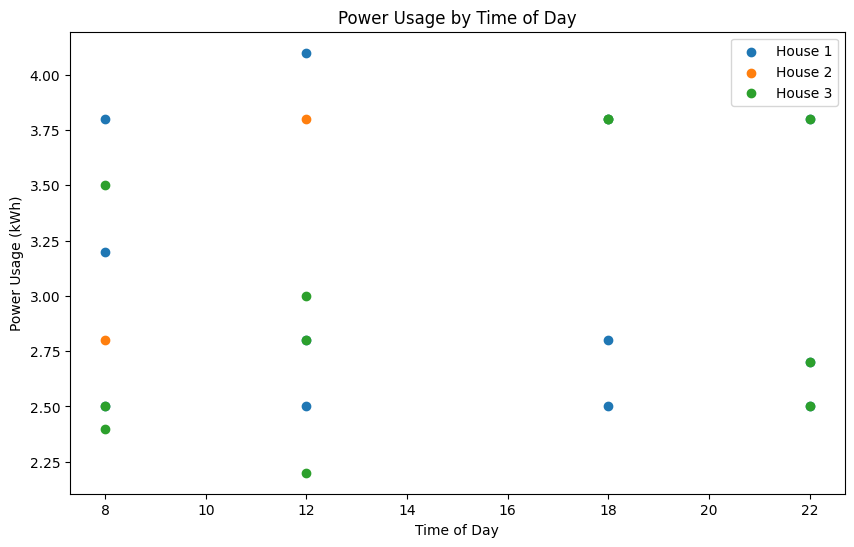

In [ ]:
# Plot power usage for each place
fig, ax = plt.subplots(figsize=(10, 6))

place_labels = le.inverse_transform(df['Place'].unique())
for place in place_labels:
    place_data = df[df['Place'] == le.transform([place])[0]]
    ax.scatter(place_data['Time_Hour'], place_data['Power Usage (kWh)'], label=place)

# Add labels and title
ax.set_xlabel('Time of Day')
ax.set_ylabel('Power Usage (kWh)')
ax.set_title('Power Usage by Time of Day')

# Add a legend
ax.legend()

# Display the plot
plt.show()